In [6]:
import yfinance as yf
import pandas as pd

In [7]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests 
from bs4 import BeautifulSoup

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url)

bs = BeautifulSoup(html_data.content, "html.parser")

tesla_revenue = pd.DataFrame( columns = ['Date', 'Revenue'])
table = bs.find_all("tbody")[1]
for row in table.find_all("tr"): 
    cells = row.find_all("td")
    date = cells[0].text
    revenue = cells[1].text
    revenue_line = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
    tesla_revenue = pd.concat([tesla_revenue, revenue_line], ignore_index = True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [12]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Show the first few rows of data
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [14]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url)

bs = BeautifulSoup(html_data.content, "html.parser")

gme_revenue = pd.DataFrame( columns = ['Date', 'Revenue'])
table = bs.find_all("tbody")[1]
for row in table.find_all("tr"): 
    cells = row.find_all("td")
    date = cells[0].text
    revenue = cells[1].text
    revenue_line = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
    gme_revenue = pd.concat([gme_revenue, revenue_line], ignore_index = True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


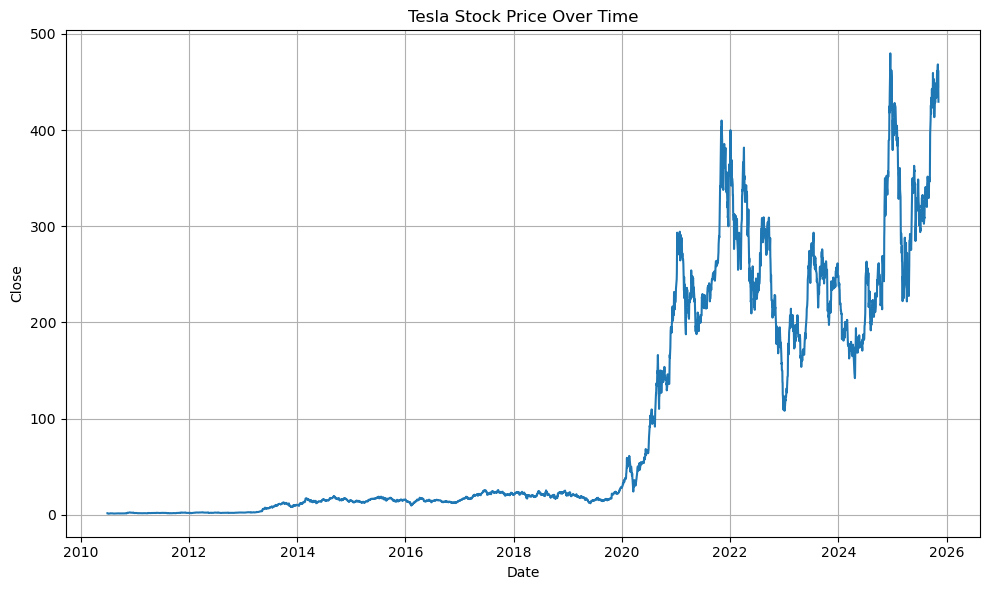

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    # Make a copy so we don't mutate user's DF
    df = stock_data.copy()

    # If Date is a column, try to parse it to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df = df.dropna(subset=['Date'])           # remove rows that couldn't be parsed
    else:
        # Maybe index is already the date — try to use it
        if not pd.api.types.is_datetime64_any_dtype(df.index):
            try:
                df.index = pd.to_datetime(df.index)
            except Exception:
                pass
        # move index to a Date column
        df = df.reset_index().rename(columns={'index': 'Date'})

    # Ensure we have a Close column (or use another price column if named differently)
    price_col = 'Close' if 'Close' in df.columns else df.columns[-1]  # fall back to last column
    df = df.sort_values('Date')

    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df[price_col])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(price_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
make_graph(tesla_data, 'Tesla Stock Price Over Time')

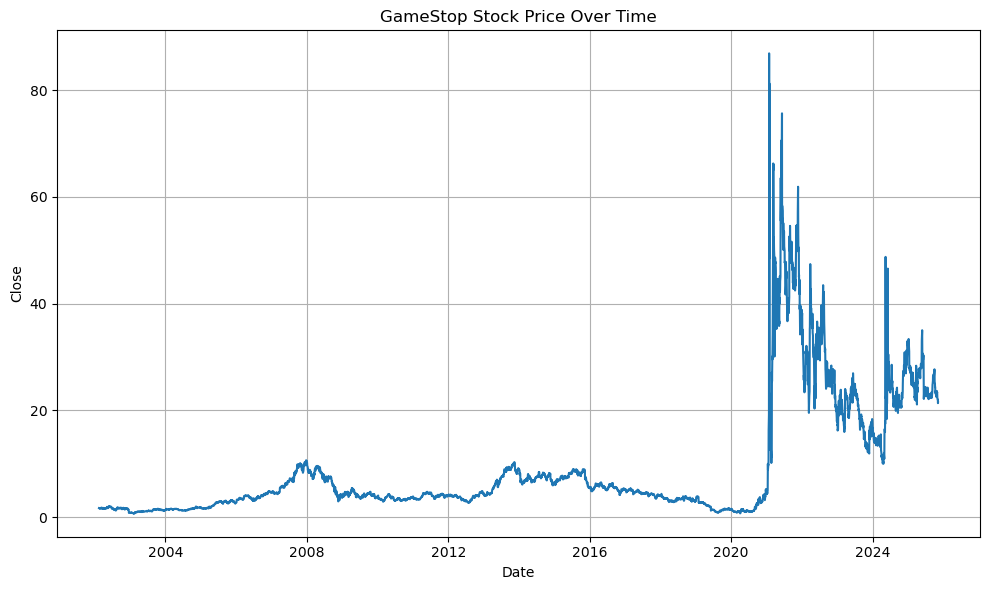

In [16]:
make_graph(gamestop_data, 'GameStop Stock Price Over Time')